# **Memuat Dataset dan Mendsiplay Beberapa Baris Pertama**

In [1]:
import pandas as pd
file_path = '[Dataset]_(Viral_Konten_MedSos).xlsx'
data = pd.read_excel(file_path)

data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# **Display informasi kolom dataset**

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  int64  
 2    n_tokens_title                 39644 non-null  int64  
 3    n_tokens_content               39644 non-null  int64  
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  int64  
 8    num_self_hrefs                 39644 non-null  int64  
 9    num_imgs                       39644 non-null  int64  
 10   num_videos                     39644 non-null  int64  
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

# **Mengecek apabila ada kolom dengan value yang kosong**

In [3]:
missing_values = data.isnull().sum()

print(data.isnull().sum())

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64


# **Bersihkan Data**

**Drop kolom yang tidak relevan**

**Drop baris dengan kolom yang kosong**

**Cek ulang jika masih ada data yang kosong atau tidak**

In [4]:
data = data.drop(columns=['url'])

data = data.dropna()

missing_values_after_cleaning = data.isnull().sum().sum()
print("Masih ada data yang kosong" if missing_values_after_cleaning > 0 else "Data Bersih")


Data Bersih


# **Validasi Nama column**
**Karena setiap column di excel punya whitespace didepan, maka dihilangkan terlebih dahulu**

In [5]:
data.columns = data.columns.str.strip()
data.columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glob

# **Melatih Data**
**Menggunakan kolom-kolom yang krusial dalam penentuan prediksi dalam pelatihan model**

**Membuat batasan untuk paling tidak berapa shares yang dimiliki konten untuk terbilang viral**

**Membuat kolom is_viral dengan value 1/0 berdasarkan threshold**

**Split data menjadi kolom dan target**

**Split data menjadi set training dan testing**

**Standarisasi kolom**

**Melatih model logistic regression**

In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

columns = [
    'n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_self_hrefs',
    'num_imgs', 'num_videos', 'average_token_length', 'num_keywords',
    'data_channel_is_lifestyle', 'data_channel_is_entertainment',
    'data_channel_is_bus', 'data_channel_is_socmed',
    'data_channel_is_tech', 'data_channel_is_world',
    'global_subjectivity', 'global_sentiment_polarity',
    'title_subjectivity', 'title_sentiment_polarity', 'shares'
]

data = data[columns]

threshold = 2000 #data['shares'].quantile(0.9)

data['is_viral'] = (data['shares'] > threshold).astype(int) #np.where(data['shares'] > threshold, 1, 0)

data = data.drop(columns=['shares'])

X = data.drop(columns=['is_viral'])
y = data['is_viral']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

# **Evaluasi akurasi model**

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Model accuracy: 0.67
Precision: 0.52
Recall: 0.15


# **Mendisplay jumlah konten yang viral dan tidak viral**

In [8]:
print(y.value_counts())

is_viral
0    26028
1    13616
Name: count, dtype: int64


# **Visualisasi data yang viral**

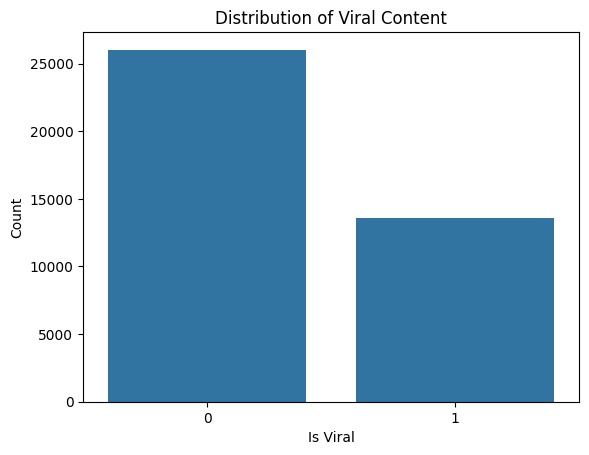

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=y)
plt.title('Distribution of Viral Content')
plt.xlabel('Is Viral')
plt.ylabel('Count')
plt.show()

# **Plot heatmap berdasarkan korelasi kolom**

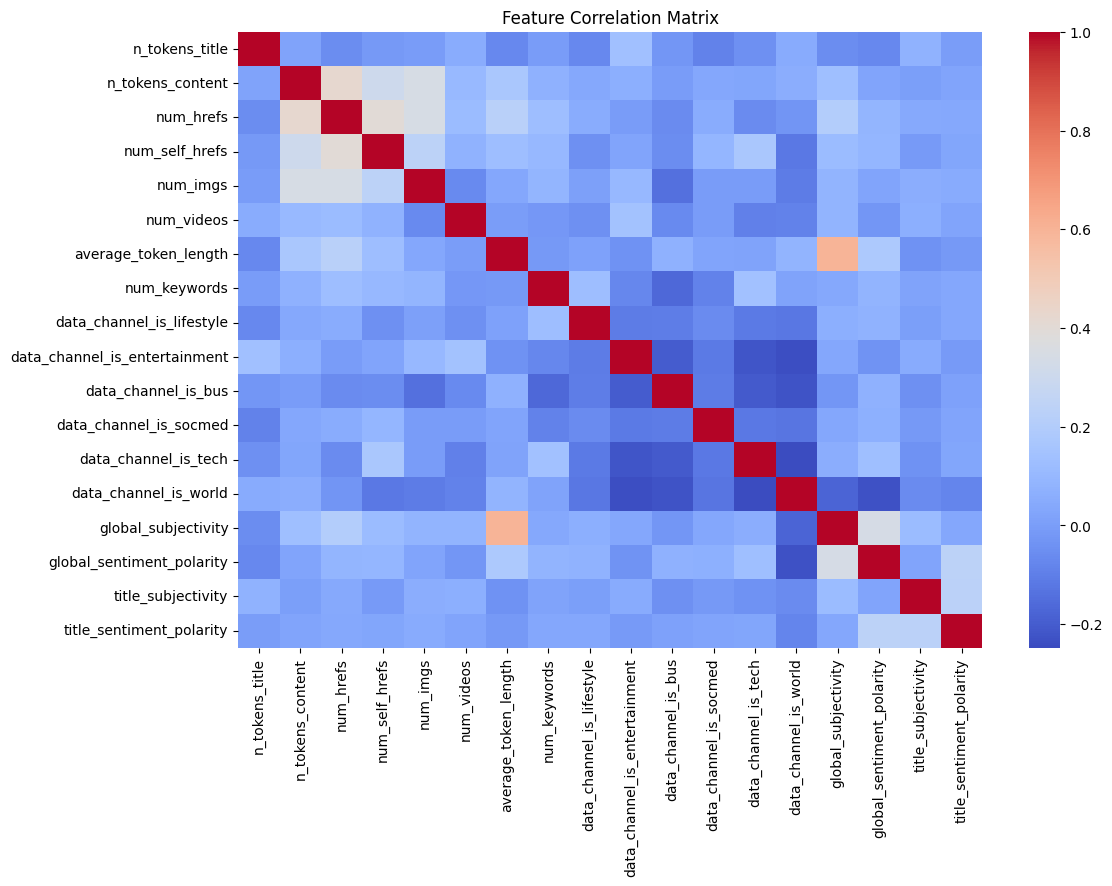

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# **Visualisasi angka untuk tiap kolom dan value nya**

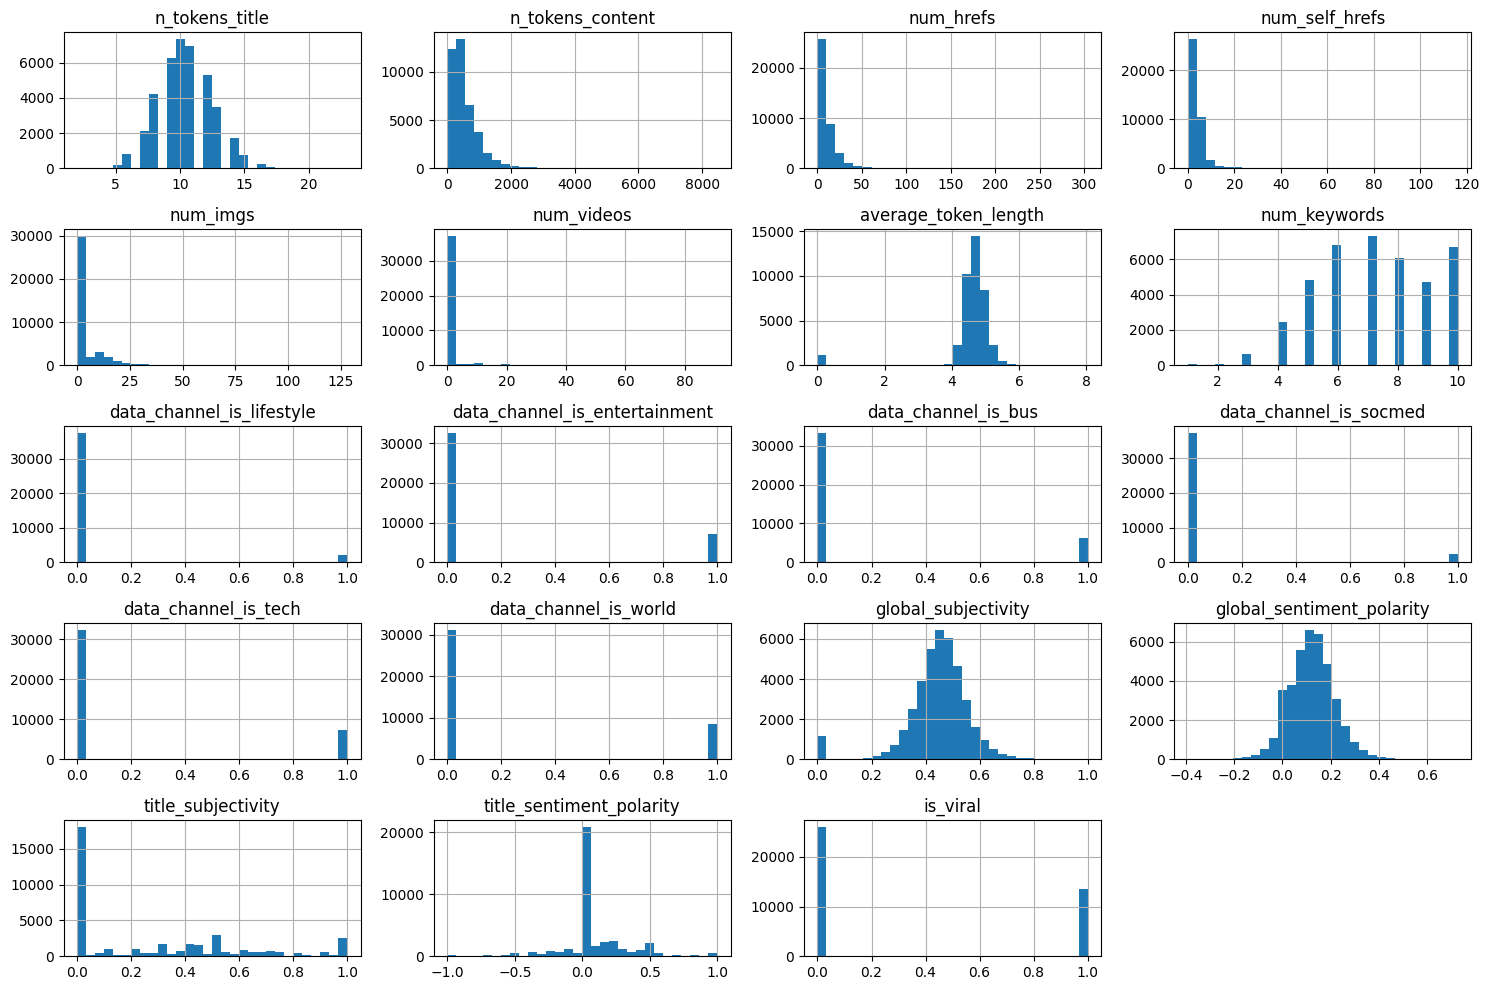

In [11]:
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# **Membuat function untuk menentukan tingkat keviralan konten**

**Standarisasi input data**

**Ambil data perdasarkan prediksi**

**Assign prediksi**

In [12]:
def predict_viral_content(input_data):
    input_df = pd.DataFrame([input_data])

    input_scaled = scaler.transform(input_df)

    prediction = model.predict(input_scaled)
    prediction_proba = model.predict_proba(input_scaled)

    is_viral = prediction[0]
    viral_probability = prediction_proba[0][1]

    return is_viral, viral_probability

user_input = {
    'n_tokens_title': int(input("Enter number of word in title: ")),
    'n_tokens_content': int(input("Enter number of word in content: ")),
    'num_hrefs': int(input("Enter number of hrefs: ")),
    'num_self_hrefs': int(input("Enter number of internal links: ")),
    'num_imgs': int(input("Enter number of images: ")),
    'num_videos': int(input("Enter number of videos: ")),
    'average_token_length': float(input("Enter average word length: ")),
    'num_keywords': int(input("Enter number of keywords: ")),
    'data_channel_is_lifestyle': int(input("Is content channel is lifestyle (0 or 1): ")),
    'data_channel_is_entertainment': int(input("Is content channel is entertainment (0 or 1): ")),
    'data_channel_is_bus': int(input("Is content channel is business (0 or 1): ")),
    'data_channel_is_socmed': int(input("Is content channel is social media (0 or 1): ")),
    'data_channel_is_tech': int(input("Is content channel is tech (0 or 1): ")),
    'data_channel_is_world': int(input("Is content channel is world (0 or 1): ")),
    'global_subjectivity': float(input("Enter global subjectivity: ")),
    'global_sentiment_polarity': float(input("Enter global sentiment polarity: ")),
    'title_subjectivity': float(input("Enter title subjectivity: ")),
    'title_sentiment_polarity': float(input("Enter title sentiment polarity: "))
}

# user_input = {
#     'n_tokens_title': 30,
#     'n_tokens_content': 1000,
#     'num_hrefs': 10,
#     'num_self_hrefs': 8,
#     'num_imgs': 10,
#     'num_videos': 9,
#     'average_token_length': 4.2,
#     'num_keywords': 9,
#     'data_channel_is_lifestyle':0,
#     'data_channel_is_entertainment': 0,
#     'data_channel_is_bus': 0,
#     'data_channel_is_socmed': 1,
#     'data_channel_is_tech': 0,
#     'data_channel_is_world': 0,
#     'global_subjectivity': 0.45,
#     'global_sentiment_polarity': 1,
#     'title_subjectivity': 1,
#     'title_sentiment_polarity': 0.2
# }

is_viral, viral_probability = predict_viral_content(user_input)

for i in user_input:
    print(f"{i}: {user_input[i]}")
print(f"Is the content viral? {'Yes' if is_viral else 'No'}")
print(f"Probability of being viral: {viral_probability:.2%}")

n_tokens_title: 30
n_tokens_content: 1000
num_hrefs: 10
num_self_hrefs: 8
num_imgs: 10
num_videos: 9
average_token_length: 4.2
num_keywords: 9
data_channel_is_lifestyle: 0
data_channel_is_entertainment: 0
data_channel_is_bus: 0
data_channel_is_socmed: 1
data_channel_is_tech: 0
data_channel_is_world: 0
global_subjectivity: 0.45
global_sentiment_polarity: 1.0
title_subjectivity: 1.0
title_sentiment_polarity: 0.2
Is the content viral? Yes
Probability of being viral: 52.77%
